In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
x = np.arange(1,11, 0.1)
random = np.random.randint(5,10,100)

In [18]:
t = np.arange(0.0, 2, 0.01)
s = np.sin(2*np.pi*t)

In [21]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence

In [25]:
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

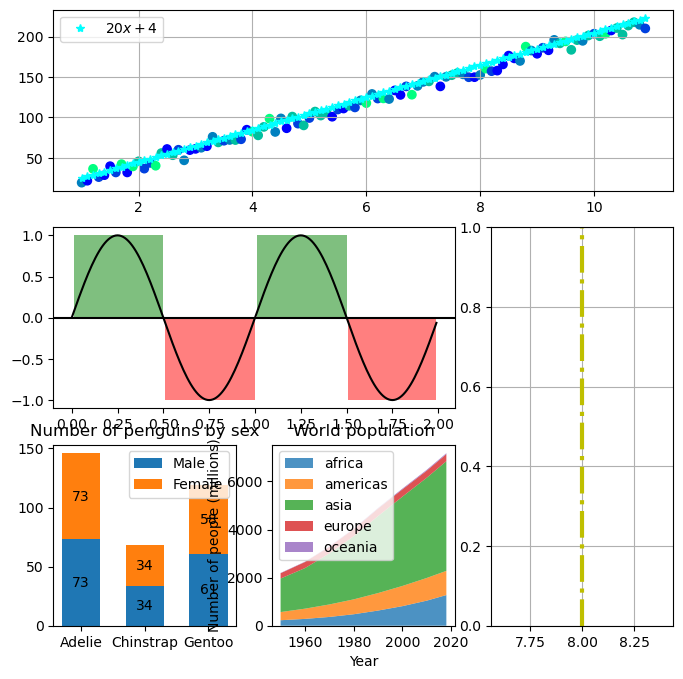

In [27]:
plt.figure(figsize = (8,8))
ax1 = plt.subplot(3,3,(1,3))
y1 = 20*x+5*np.random.randn(100)
ax1.scatter(x,y1, c= random, cmap="winter")
ax1.plot(x, 20*x+5, '*', color='cyan', label='$20x+4$')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(3,3,(4,5))
ax2.plot(t,s,color='black')
ax2.axhline(0,color='black')
ax2.fill_between(t, 1, where=s>0, facecolor = 'green', alpha=0.5)
ax2.fill_between(t, -1, where =s <0, facecolor ='red', alpha=0.5)

ax3= plt.subplot(3,3,7)
bottom = np.zeros(3)
for sex, sex_count in sex_counts.items():
    p = ax3.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax3.bar_label(p, label_type='center')

ax3.set_title('Number of penguins by sex')
ax3.legend()


ax4 = plt.subplot(3,3,8)
ax4.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax4.legend(loc='upper left')
ax4.set_title('World population')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of people (millions)')


ax5 = plt.subplot(3,3,(6,9))
ax5.axvline(8, ls='-.', lw=3, c='y')
ax5.grid(True)

axes = [ax1, ax2, ax3, ax4, ax5]

In [29]:
img = Image.open("Full_Moon_Luc_Viatour.jpg")

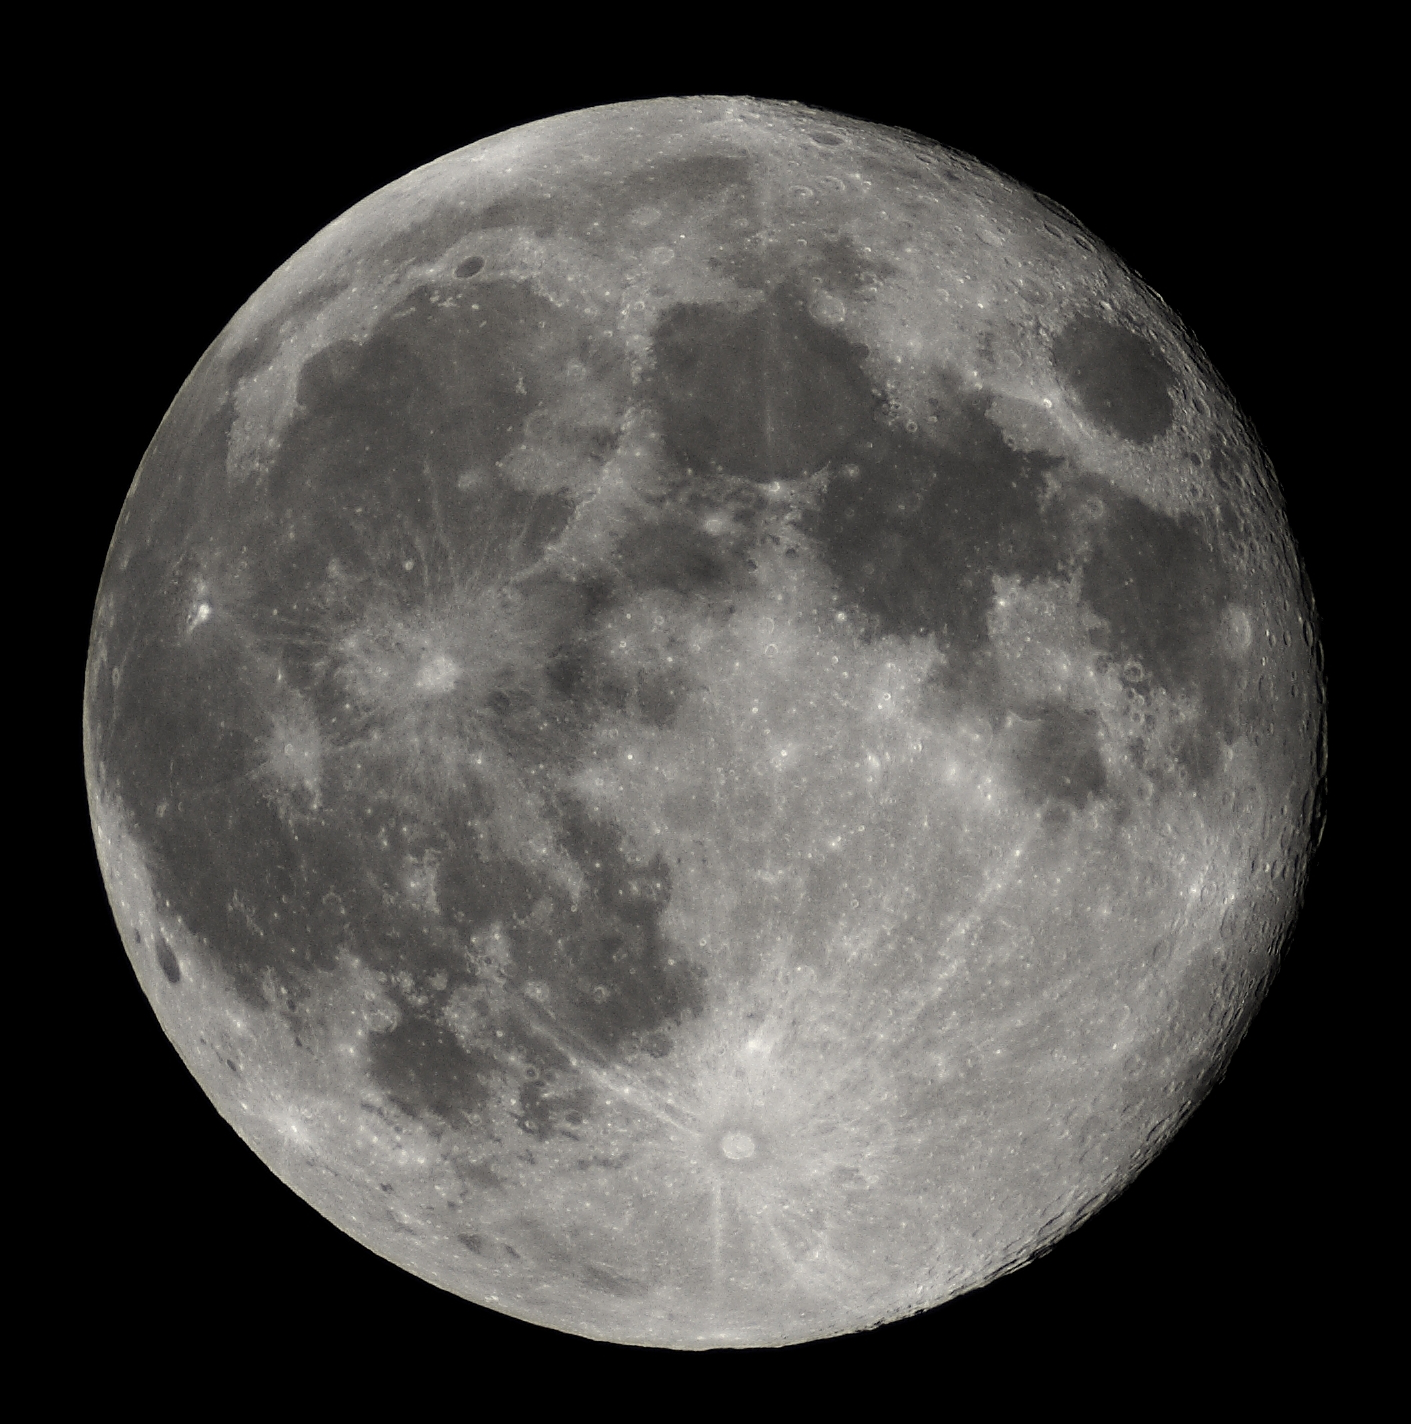

In [30]:
img

In [41]:
im_datos = np.array(img)

In [42]:
alto, ancho, dim= im_datos.shape
print(alto, ancho, dim)

1424 1411 3


In [43]:
for x in range(0, alto):
    for y in range(0, ancho):
        if im_datos[x][y][0] == 0 and im_datos[x][y][1] ==0 and im_datos[x][y][2]==0:
            im_datos[x][y] = [138, 43, 226]

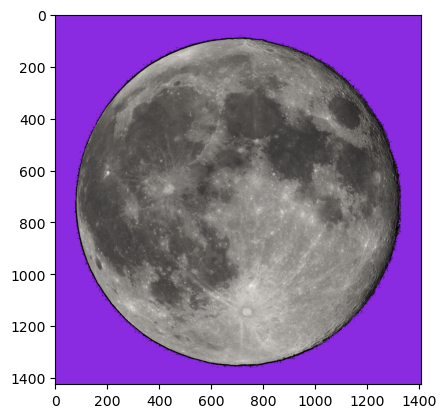

In [44]:
plt.imshow(im_datos)

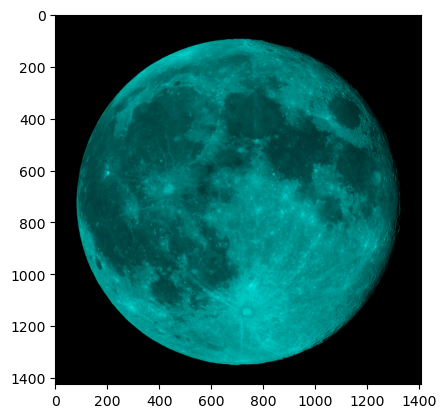

In [63]:
img_red =  np.array(img)
red,green,blue = img_red.T
red[:]=0
plt.imshow(img_red)

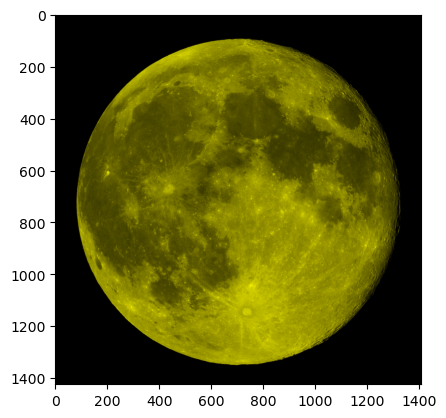

In [65]:
img_green =  np.array(img)
red, green, blue = img_green.T
green[:]=0
plt.imshow(img_green)

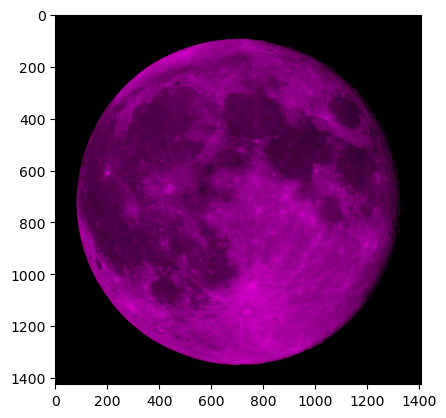

In [64]:
img_blue =  np.array(img)
red, green, blue = img_blue.T
blue[:]=0
plt.imshow(img_blue)

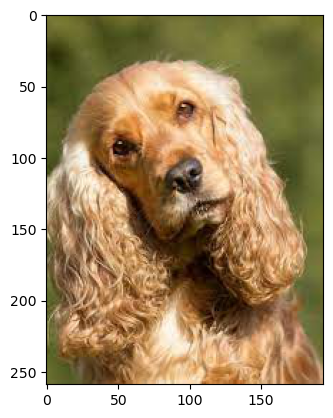

In [72]:
img2 = Image.open("cocker_spaniel.jpg")
img2= np.array(img2)
plt.imshow(img2)

https://blog.finxter.com/how-to-convert-an-image-from-rgb-to-grayscale-in-python/

In [69]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

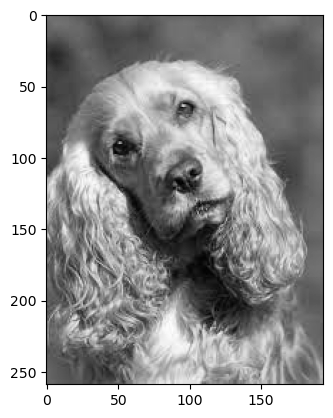

In [75]:
img2_gray = rgb2gray(img2)
plt.imshow(img2_gray, cmap='gray')

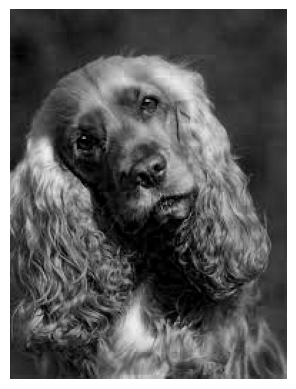

In [78]:
img2_b = Image.open("cocker_spaniel.jpg")
img2_b= np.array(img2_b)
alto, ancho, dim= img2_b.shape

for x in range(0, alto):
    for y in range(0, ancho):
        img2_b[x][y][0] = img2_b[x][y][1] = img2_b[x][y][2]
        
plt.axis('off')
plt.imshow(img2_b)

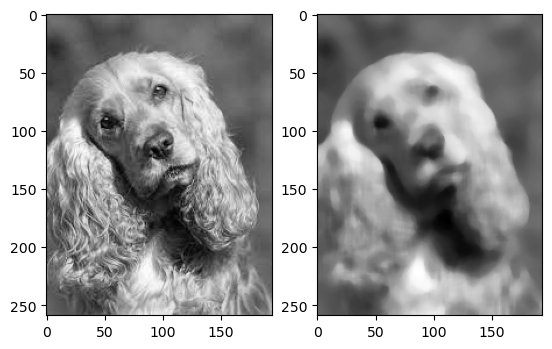

In [81]:
from scipy import ndimage
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.median_filter(img2_gray, size=10)
ax1.imshow(img2_gray)
ax2.imshow(result)
plt.show()